Práctica 01: Estadística Descriptiva

# Introducción

En este cuaderno exploraremos una práctica aplicada utilizando herramientas fundamentales de Python, con el propósito de realizar un análisis descriptivo de datos reales relacionados con nacimientos de niños en San Gil, Santander. 

A través de esta actividad, se busca ilustrar cómo emplear estructuras básicas de programación, manipulación de datos con pandas, y visualizaciones con matplotlib o seaborn, para obtener conclusiones estadísticas relevantes en un contexto local.

Parte 1: Cargar la base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Nacimientos_20250206.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())


Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Periodo                      928 non-null    int64  
 1   Departamento Nacimiento      928 non-null    object 
 2   Municipio                    928 non-null    object 
 3   Area                         928 non-null    object 
 4   Sexo                         928 non-null    object 
 5   Peso                         928 non-null    int64  
 6   Talla                        928 non-null    int64  
 7   Fecha_Nacimiento             928 non-null    object 
 8   Hora_Nacimiento              928 non-null    object 
 9   Tiempo_Gestación             927 non-null    float64
 10  Número_Consultas_Prenatales  928 non-null    int64  
 11  Tipo_Parto                   928 non-null    object 
 12  Multiplicidad_Embarazo       928 non-null    object 
 

3. Limpieza de los datos


Valores faltantes por columna:
Periodo                         0
Departamento Nacimiento         0
Municipio                       0
Area                            0
Sexo                            0
Peso                            0
Talla                           0
Fecha_Nacimiento                0
Hora_Nacimiento                 0
Tiempo_Gestación                1
Número_Consultas_Prenatales     0
Tipo_Parto                      0
Multiplicidad_Embarazo          0
Edad_Madre                      0
Régimen_Seguridad_Social        0
EPS                            65
Edad Padre                      2
dtype: int64


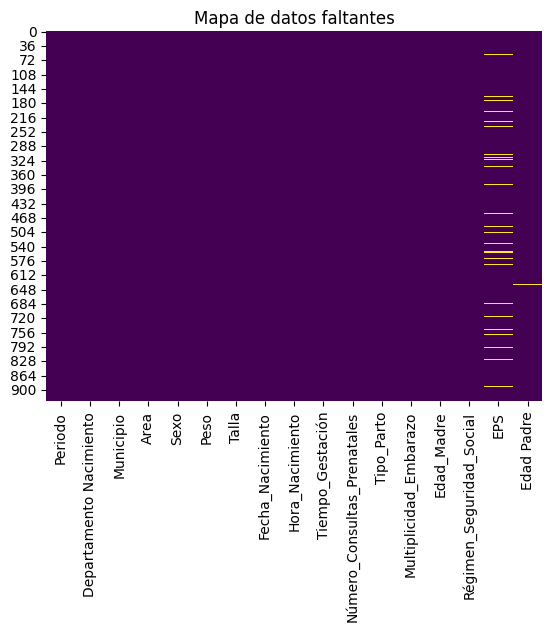

In [2]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

3.1 Tratamiento de los datos faltantes


Número de filas después de eliminar datos faltantes: 861

Datos faltantes por columna después de la limpieza:
Periodo                        0
Departamento Nacimiento        0
Municipio                      0
Area                           0
Sexo                           0
Peso                           0
Talla                          0
Fecha_Nacimiento               0
Hora_Nacimiento                0
Tiempo_Gestación               0
Número_Consultas_Prenatales    0
Tipo_Parto                     0
Multiplicidad_Embarazo         0
Edad_Madre                     0
Régimen_Seguridad_Social       0
EPS                            0
Edad Padre                     0
dtype: int64


C:\Users\anfalear\AppData\Local\Temp\ipykernel_8832\78099791.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


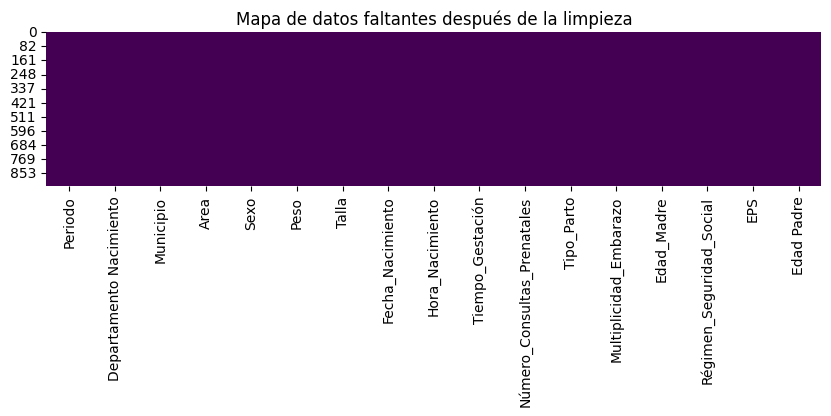

In [3]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()


4. Análisis gráfico: Se presentan histogramas y boxplot para variables numéricas y diagramas de barras o tortas para variables categóricas

4.1 Histogramas

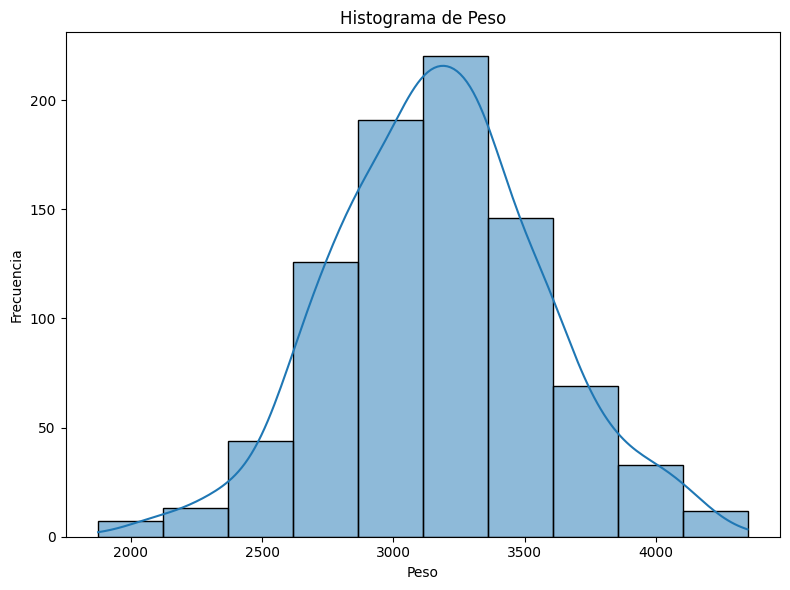

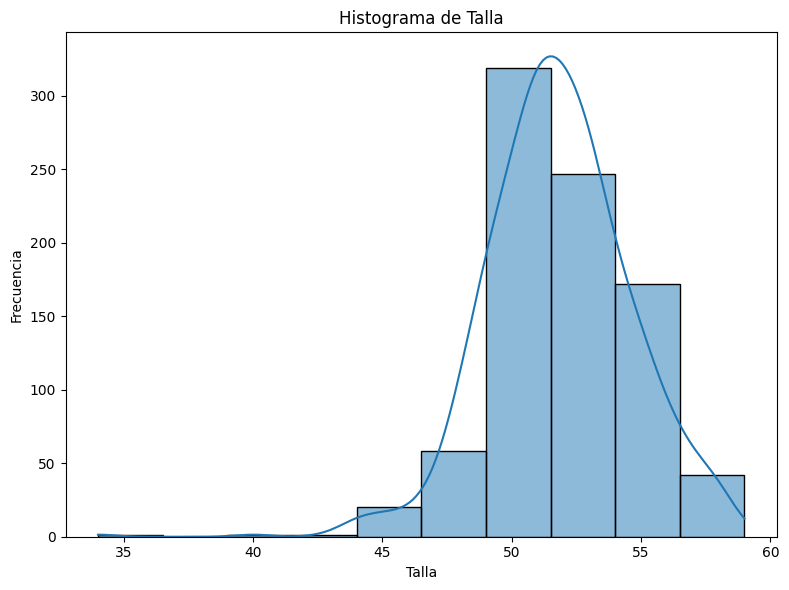

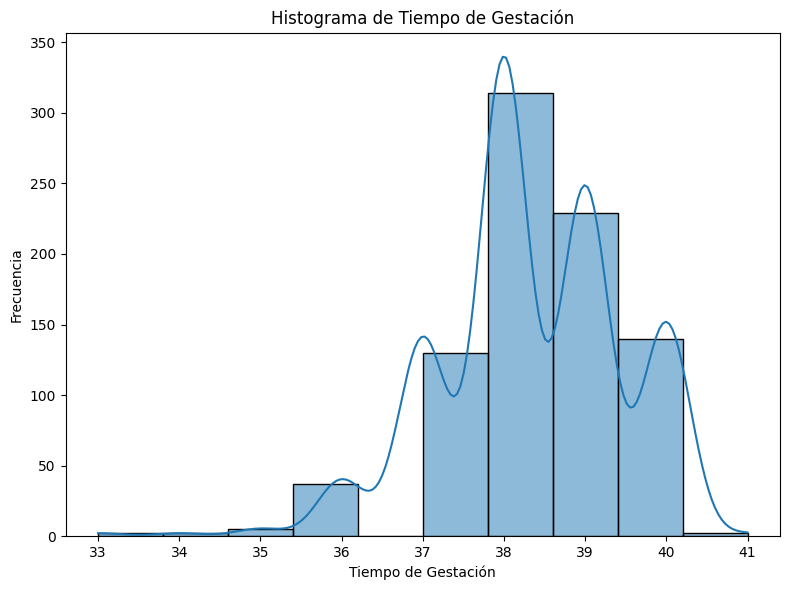

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Peso
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Peso'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso')
plt.tight_layout()
plt.show()

# Histograma para Talla
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Talla'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.title('Histograma de Talla')
plt.tight_layout()
plt.show()

# Histograma para Tiempo de Gestación
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Tiempo_Gestación'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Tiempo de Gestación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de Gestación')
plt.tight_layout()
plt.show()


4.2 Diagramas de cajas

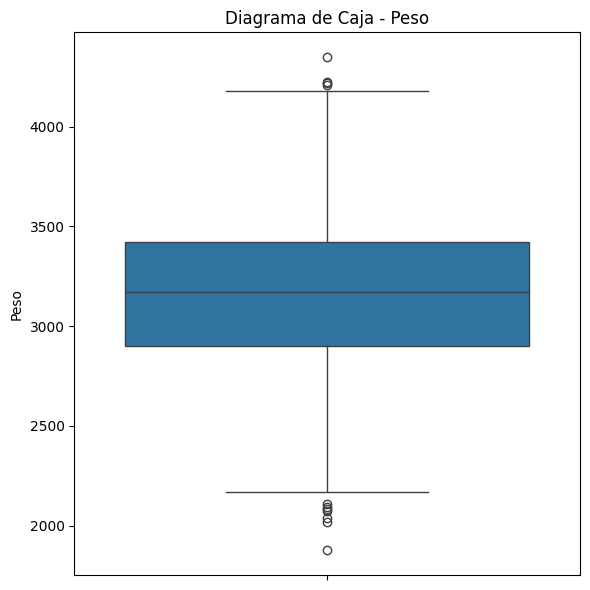

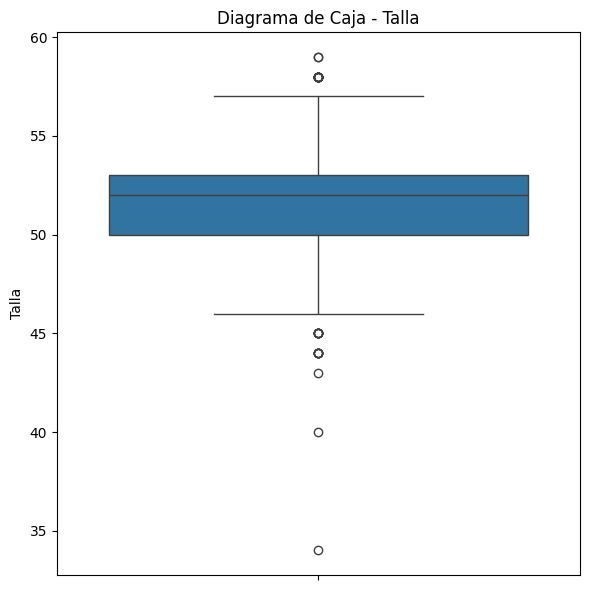

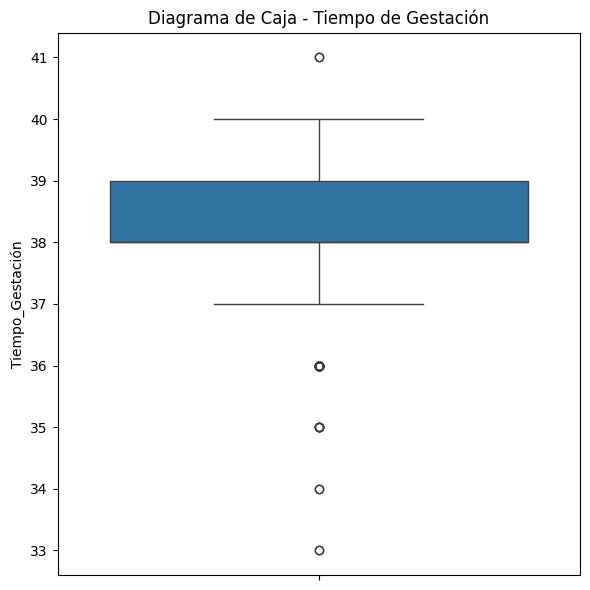

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Peso
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Peso'])
plt.title('Diagrama de Caja - Peso')
plt.tight_layout()
plt.show()

# Diagrama de caja para Talla
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Talla'])
plt.title('Diagrama de Caja - Talla')
plt.tight_layout()
plt.show()

# Diagrama de caja para Tiempo de Gestación
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Tiempo_Gestación'])
plt.title('Diagrama de Caja - Tiempo de Gestación')
plt.tight_layout()
plt.show()


4.3 Graficos de torta para variables categóricas

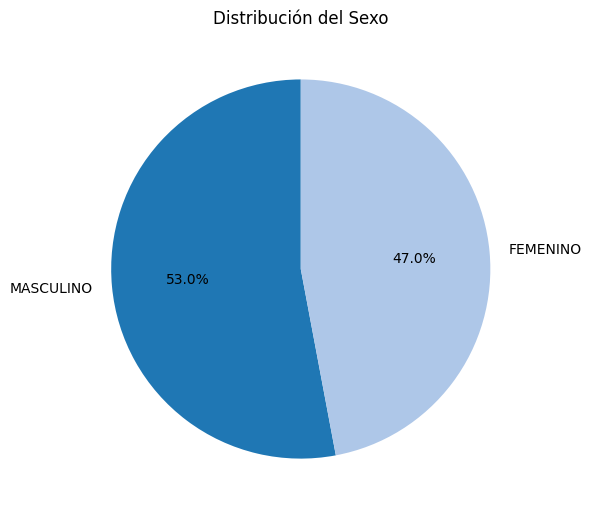

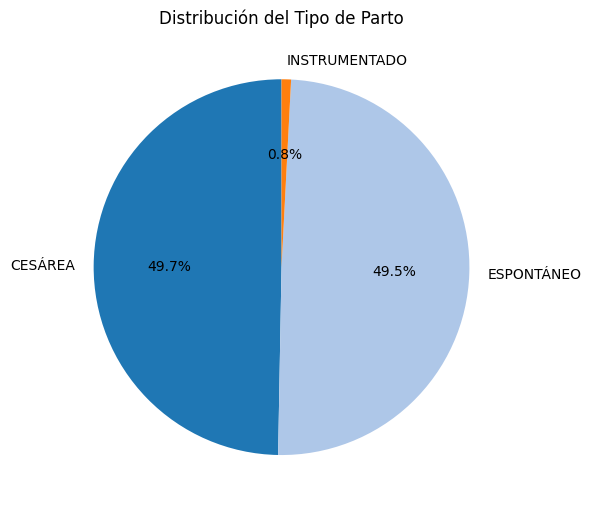

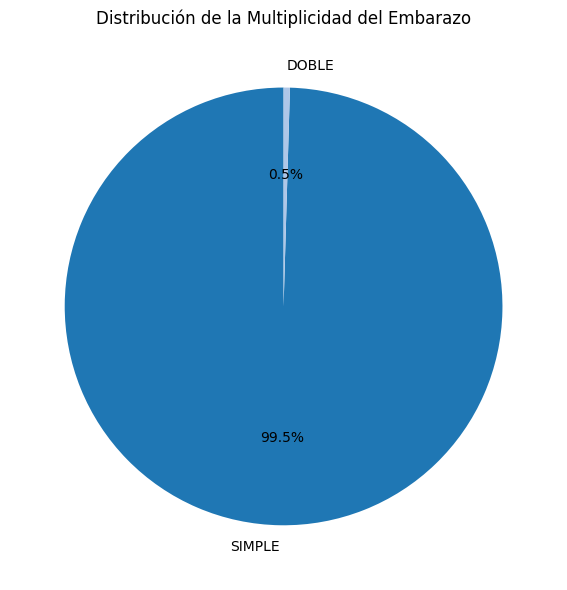

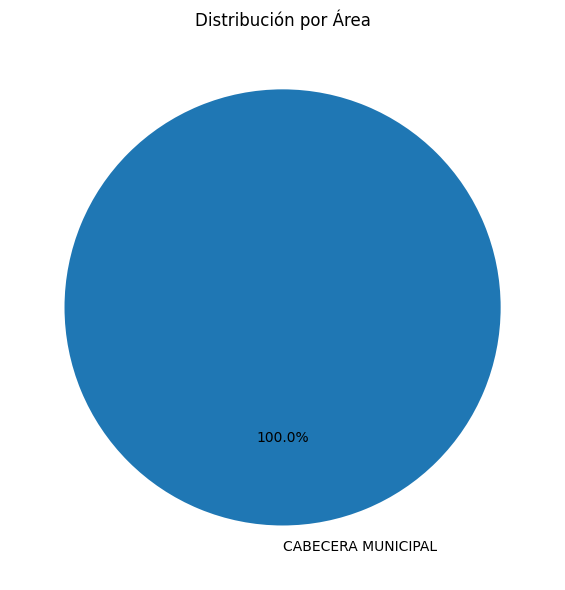

In [7]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Sexo', 'Distribución del Sexo'),
    ('Tipo_Parto', 'Distribución del Tipo de Parto'),
    ('Multiplicidad_Embarazo', 'Distribución de la Multiplicidad del Embarazo'),
    ('Area', 'Distribución por Área')
]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()


C:\Users\anfalear\AppData\Local\Temp\ipykernel_8832\2923291928.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


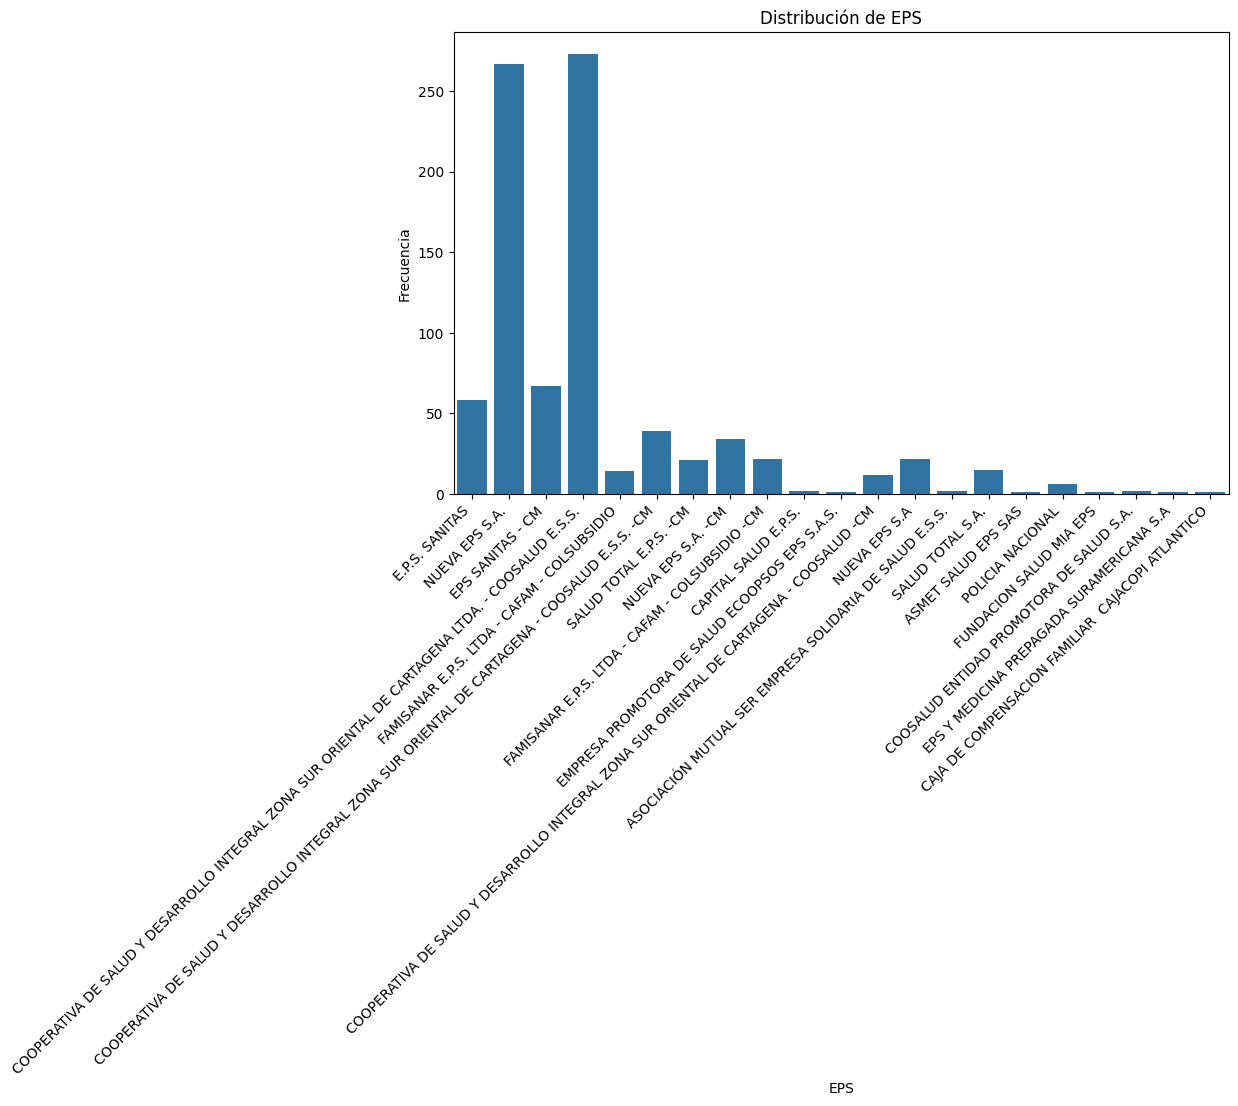

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='EPS')
plt.title('Distribución de EPS')
plt.xlabel('EPS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()


5. Análisis de outliers (valores atípicos)

In [9]:
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['Talla', 'Peso']].quantile(0.25)
Q3 = df_filtrado[['Talla', 'Peso']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['Talla'] >= limite_inferior['Talla']) & (df_filtrado['Talla'] <= limite_superior['Talla']) &
    (df_filtrado['Peso'] >= limite_inferior['Peso']) & (df_filtrado['Peso'] <= limite_superior['Peso'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")


Número de datos restantes después de eliminar outliers: 819


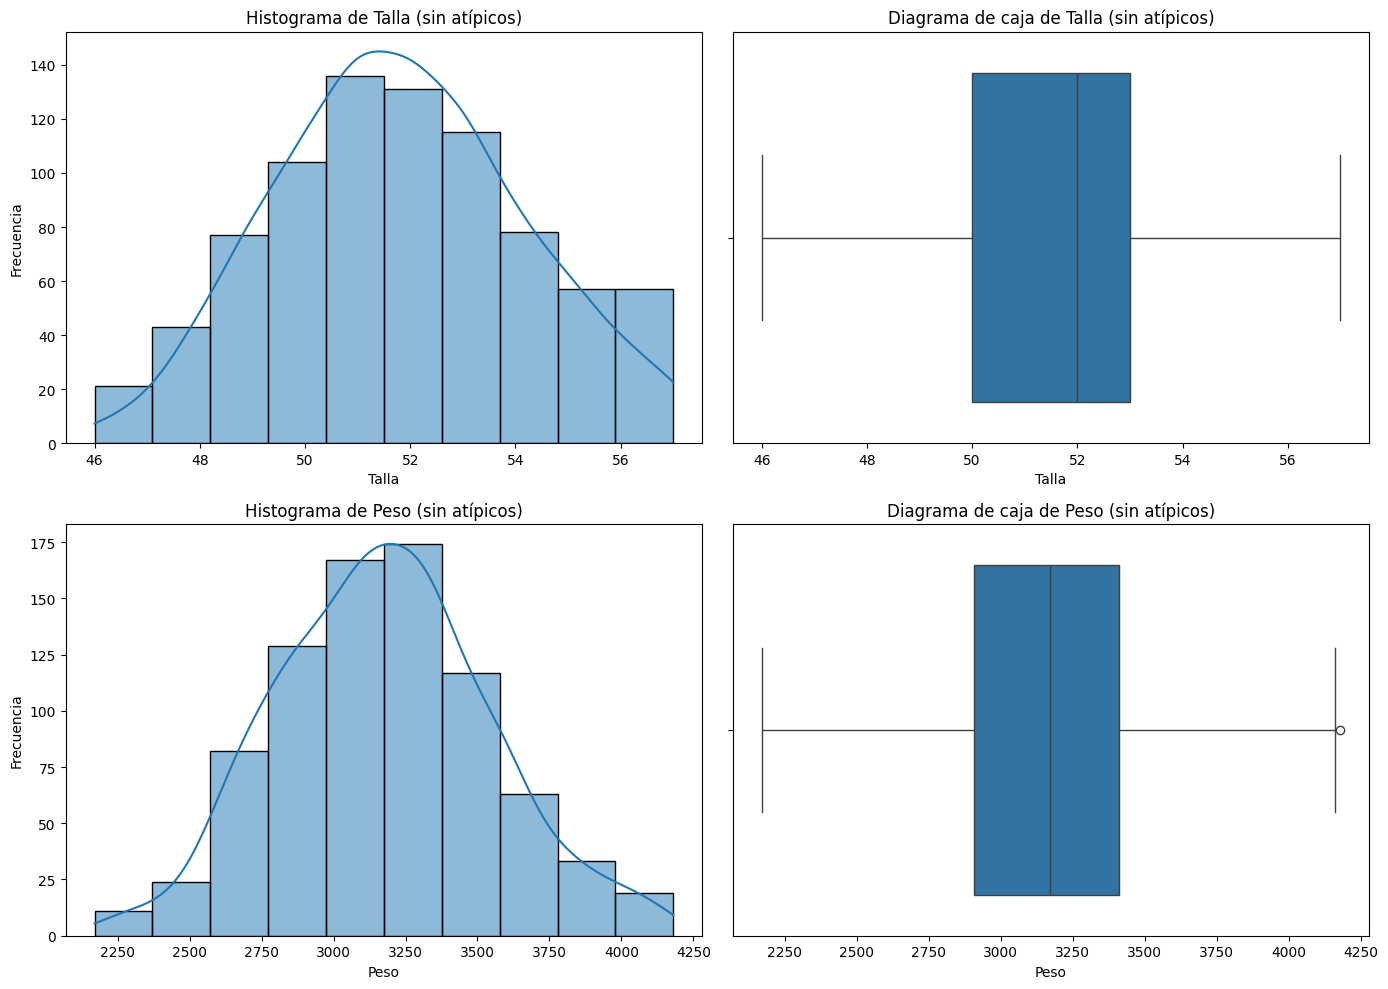

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para Talla
sns.histplot(df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Talla')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de Talla (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Talla'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Talla')
axes[0, 1].set_title('Diagrama de caja de Talla (sin atípicos)')

# Histograma y boxplot para Peso
sns.histplot(df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Peso')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Peso (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Peso'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Peso')
axes[1, 1].set_title('Diagrama de caja de Peso (sin atípicos)')

plt.tight_layout()
plt.show()


5.1 Análisis de normalidad de las variables después de eliminar outliers

Resultados de los tests de normalidad (valores p):

Variable: Talla
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 6.3486, Crítico (5%): 0.7840
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según mayoría de tests)

Variable: Peso
  Shapiro-Wilk p = 0.2838
  Kolmogorov-Smirnov p = 0.6305
  Anderson-Darling Estadístico: 0.4287, Crítico (5%): 0.7840
  Jarque-Bera p = 0.8445
  → Distribución normal (según mayoría de tests)



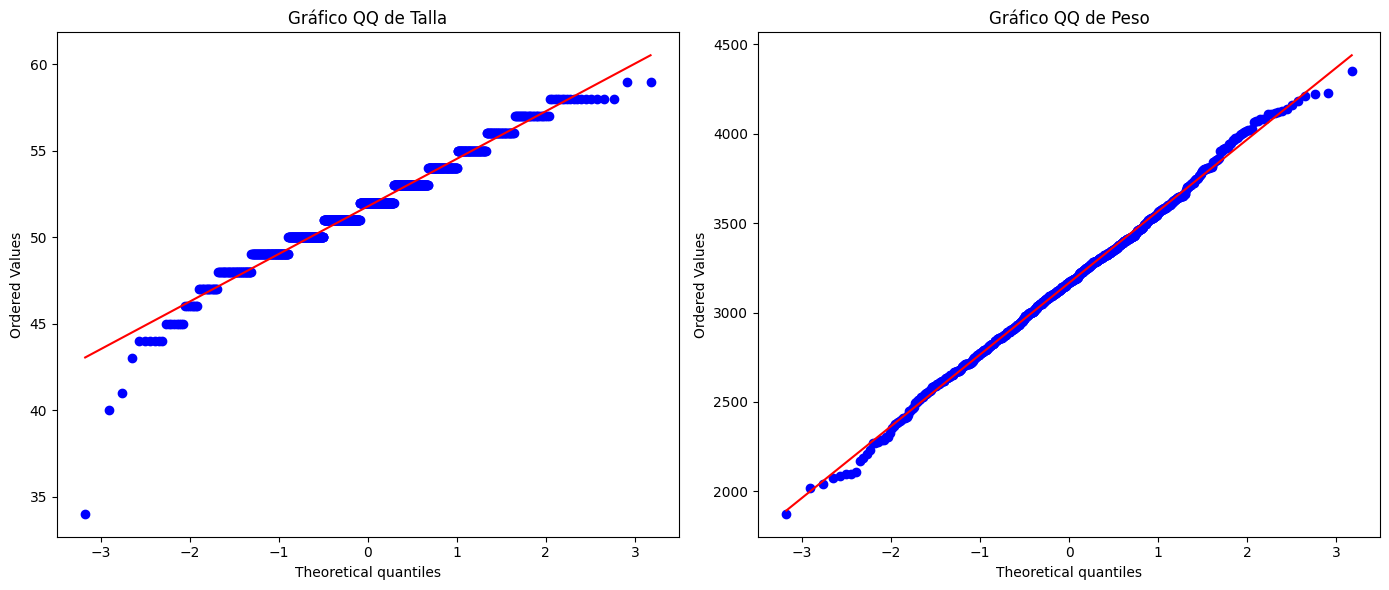

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['Talla', 'Peso']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable
for col in columnas_fisicas:
    if col in df.columns:
        datos = df[col].dropna()
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(datos)
        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))
        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # 5%
        ad_normal = stat_ad < crit_ad
        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)
        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 3
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(columnas_fisicas):
    if col in df.columns:
        probplot(df[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()



6. Código que resume todo

🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE NACIMIENTOS
🚀 INICIANDO ANÁLISIS ESTADÍSTICO COMPLETO
CARGANDO Y EXPLORANDO DATOS
✓ Archivo cargado exitosamente: C:\Users\anfalear\notasestinferencial\notebooks\Nacimientos_20250206.csv
✓ Dimensiones del dataset: (928, 17)

--- INFORMACIÓN DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Periodo                      928 non-null    int64  
 1   Departamento Nacimiento      928 non-null    object 
 2   Municipio                    928 non-null    object 
 3   Area                         928 non-null    object 
 4   Sexo                         928 non-null    object 
 5   Peso                         928 non-null    int64  
 6   Talla                        928 non-null    int64  
 7   Fecha_Nacimiento             928 non-null    object 
 8   Hora_Nacimiento 

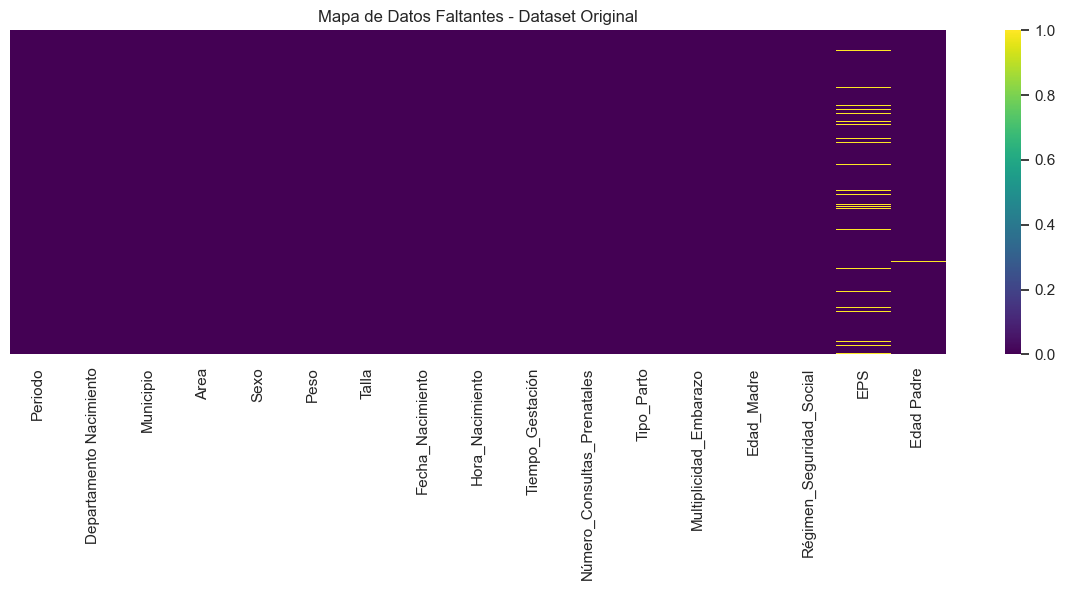


✓ Filas eliminadas: 67
✓ Datos restantes: 861
✓ Porcentaje de datos conservados: 92.8%


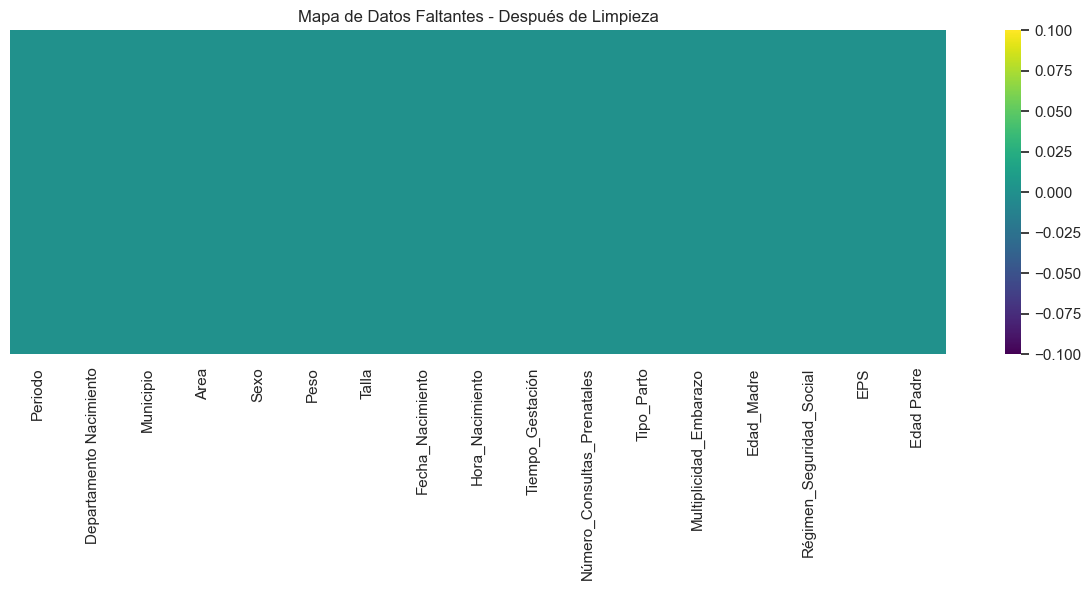


ELIMINACIÓN DE VALORES ATÍPICOS
Peso: Q1=2900.00, Q3=3420.00, IQR=520.00
  Límites: [2120.00, 4200.00]
  Outliers eliminados: 11
Talla: Q1=50.00, Q3=53.00, IQR=3.00
  Límites: [45.50, 57.50]
  Outliers eliminados: 31
Tiempo_Gestación: Q1=38.00, Q3=39.00, IQR=1.00
  Límites: [36.50, 40.50]
  Outliers eliminados: 43

✓ Total de registros eliminados por outliers: 85
✓ Datos finales: 776
✓ Porcentaje conservado: 83.6%

ANÁLISIS DE NORMALIDAD

DATASET FILTRADO:
----------------------------------------
Peso: Shapiro-Wilk=0.9976, p-valor=0.234607, Curtosis=0.088, Asimetría=0.035
  Resultado: ✓ Distribución NORMAL (no se rechaza H0)

Talla: Shapiro-Wilk=0.9703, p-valor=0.000000, Curtosis=2.102, Asimetría=-0.373
  Resultado: ✗ Distribución NO NORMAL (se rechaza H0)

Tiempo_Gestación: Shapiro-Wilk=0.9106, p-valor=0.000000, Curtosis=0.863, Asimetría=-0.509
  Resultado: ✗ Distribución NO NORMAL (se rechaza H0)


DATASET SIN OUTLIERS:
----------------------------------------
Peso: Shapiro-Wilk=0.9

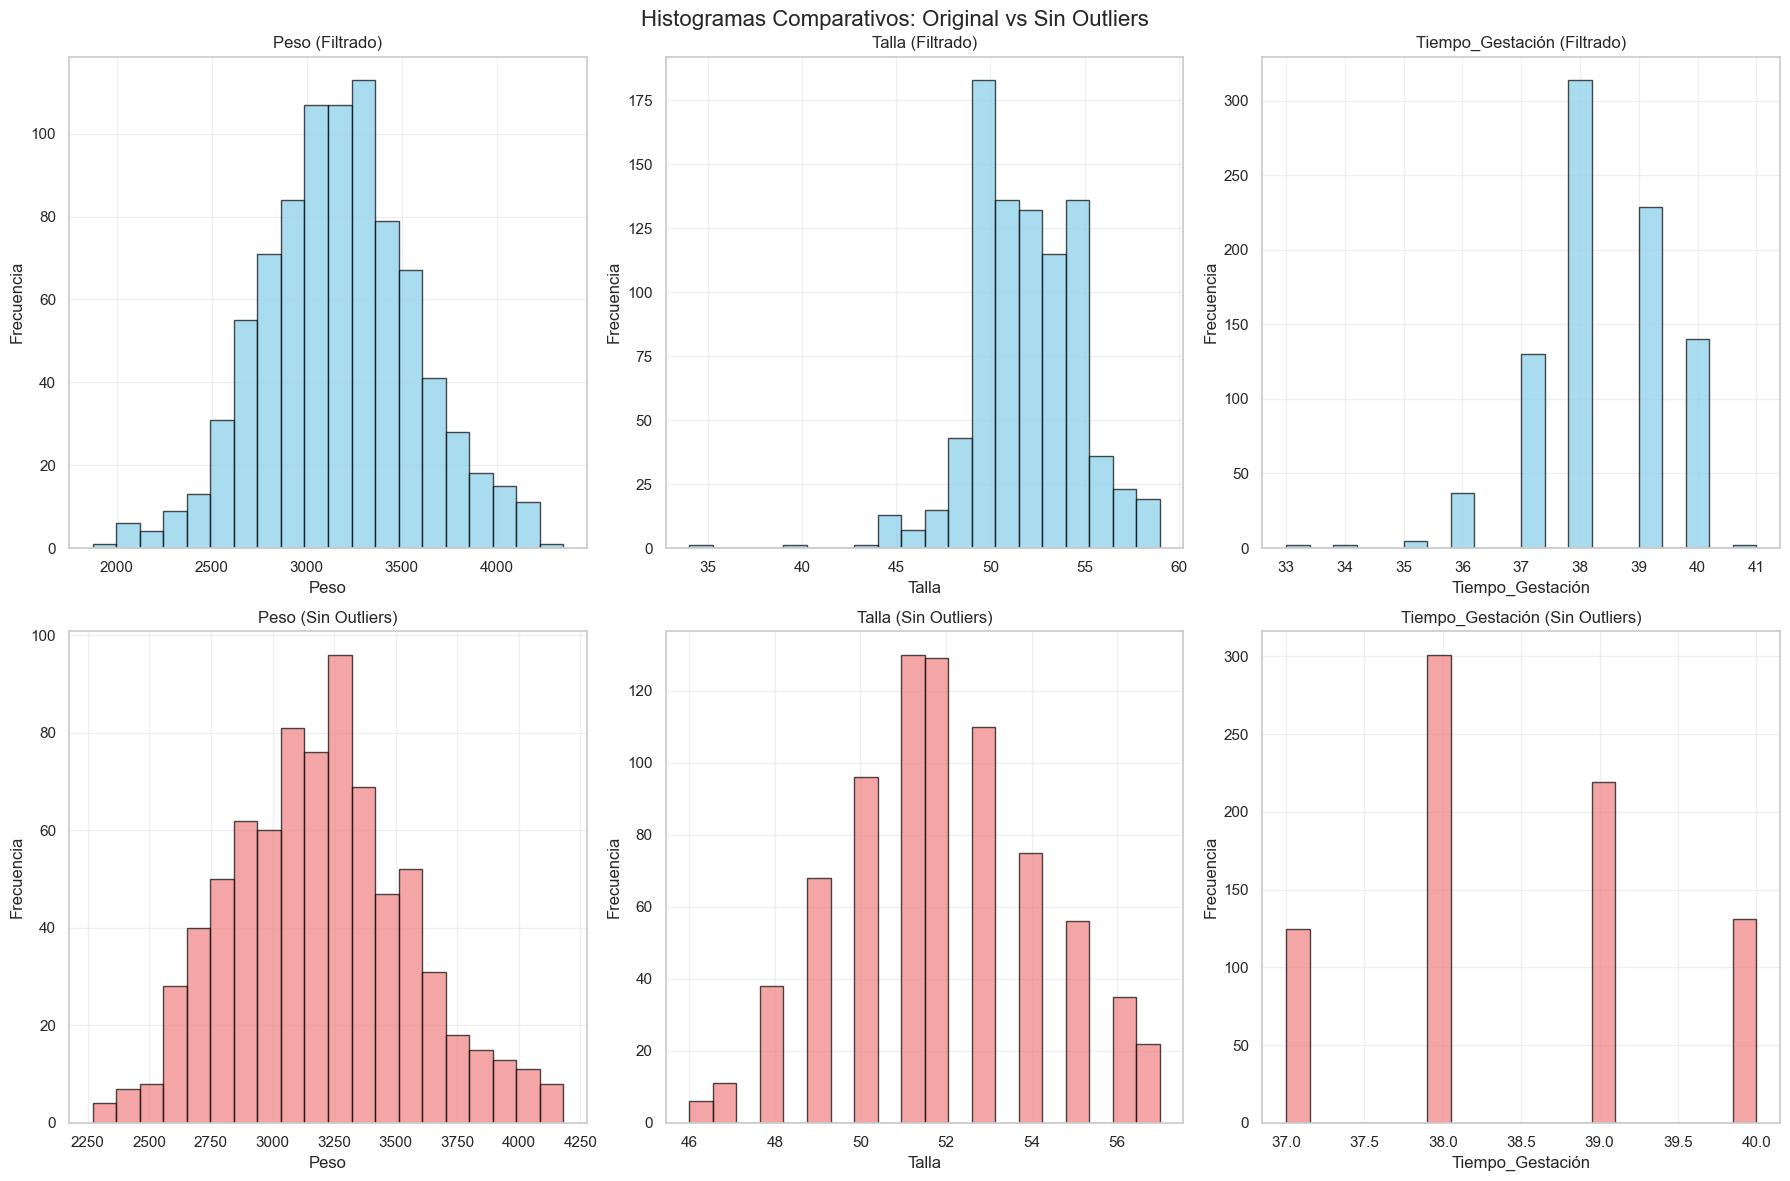


GENERANDO DIAGRAMAS DE CAJA


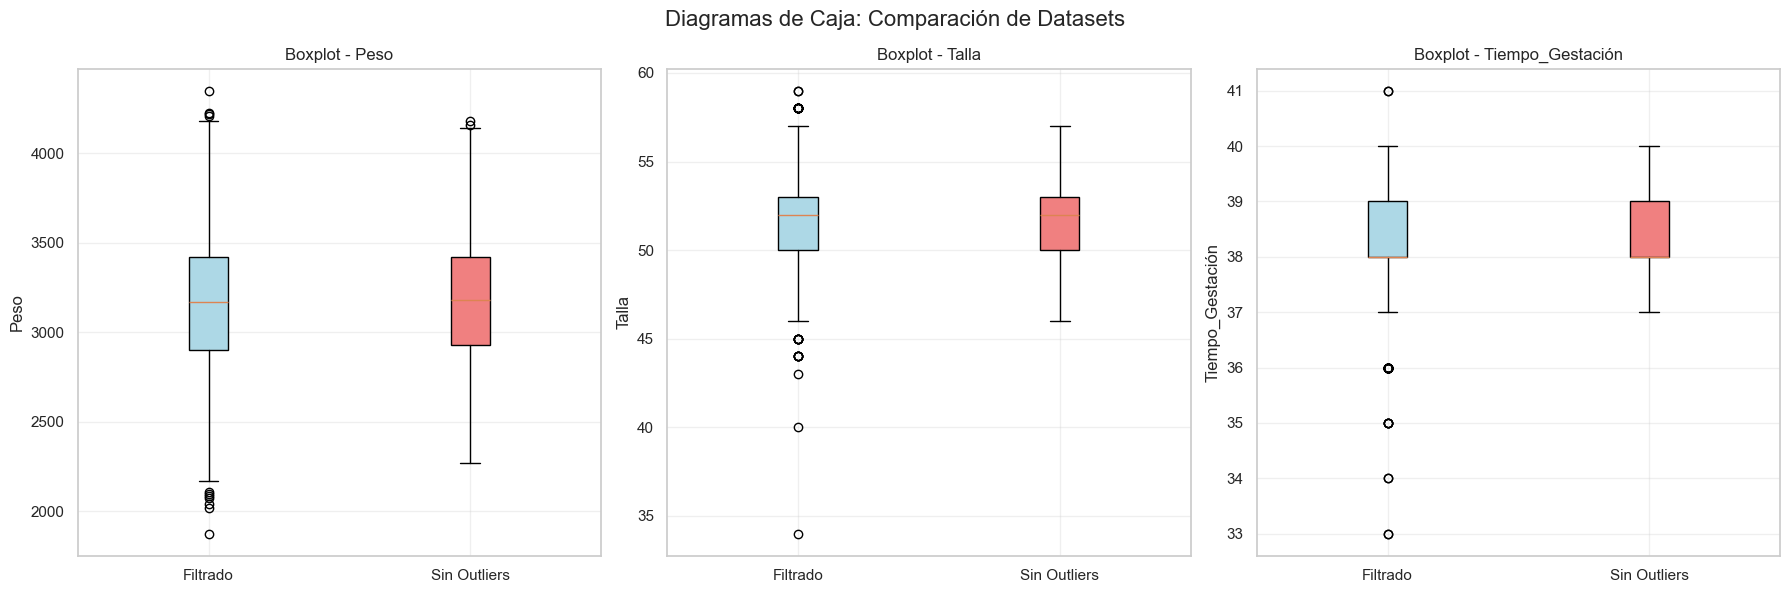


ANÁLISIS DE VARIABLES CATEGÓRICAS

Sexo:
  MASCULINO: 407 (52.4%)
  FEMENINO: 369 (47.6%)

Tipo_Parto:
  CESÁREA: 388 (50.0%)
  ESPONTÁNEO: 382 (49.2%)
  INSTRUMENTADO: 6 (0.8%)

Multiplicidad_Embarazo:
  SIMPLE: 775 (99.9%)
  DOBLE: 1 (0.1%)


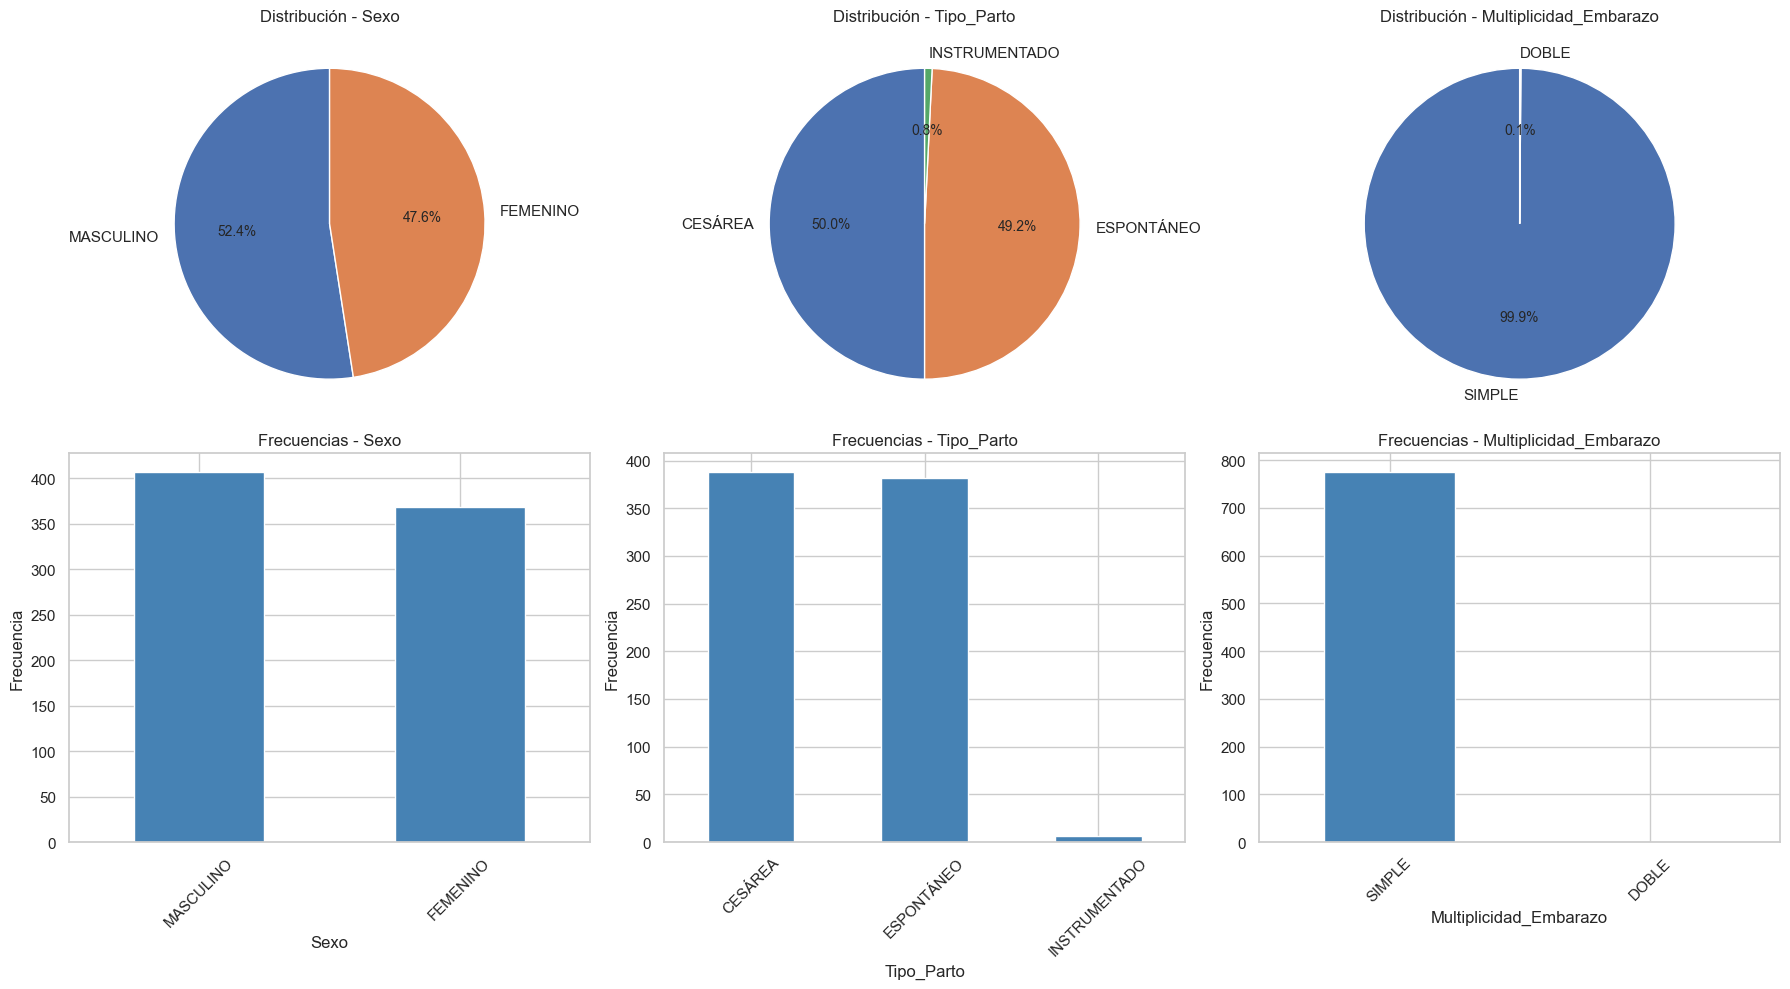


ANÁLISIS DE VARIABLES ADICIONALES

--- Analizando EPS ---
  Total de categorías únicas: 20
  Top 5 categorías:
    NUEVA EPS S.A.: 244
    COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA LTDA. - COOSALUD E.S.S.: 241
    EPS SANITAS - CM: 63
    E.P.S. SANITAS: 51
    COOPERATIVA DE SALUD Y DESARROLLO INTEGRAL ZONA SUR ORIENTAL DE CARTAGENA - COOSALUD E.S.S. -CM: 37


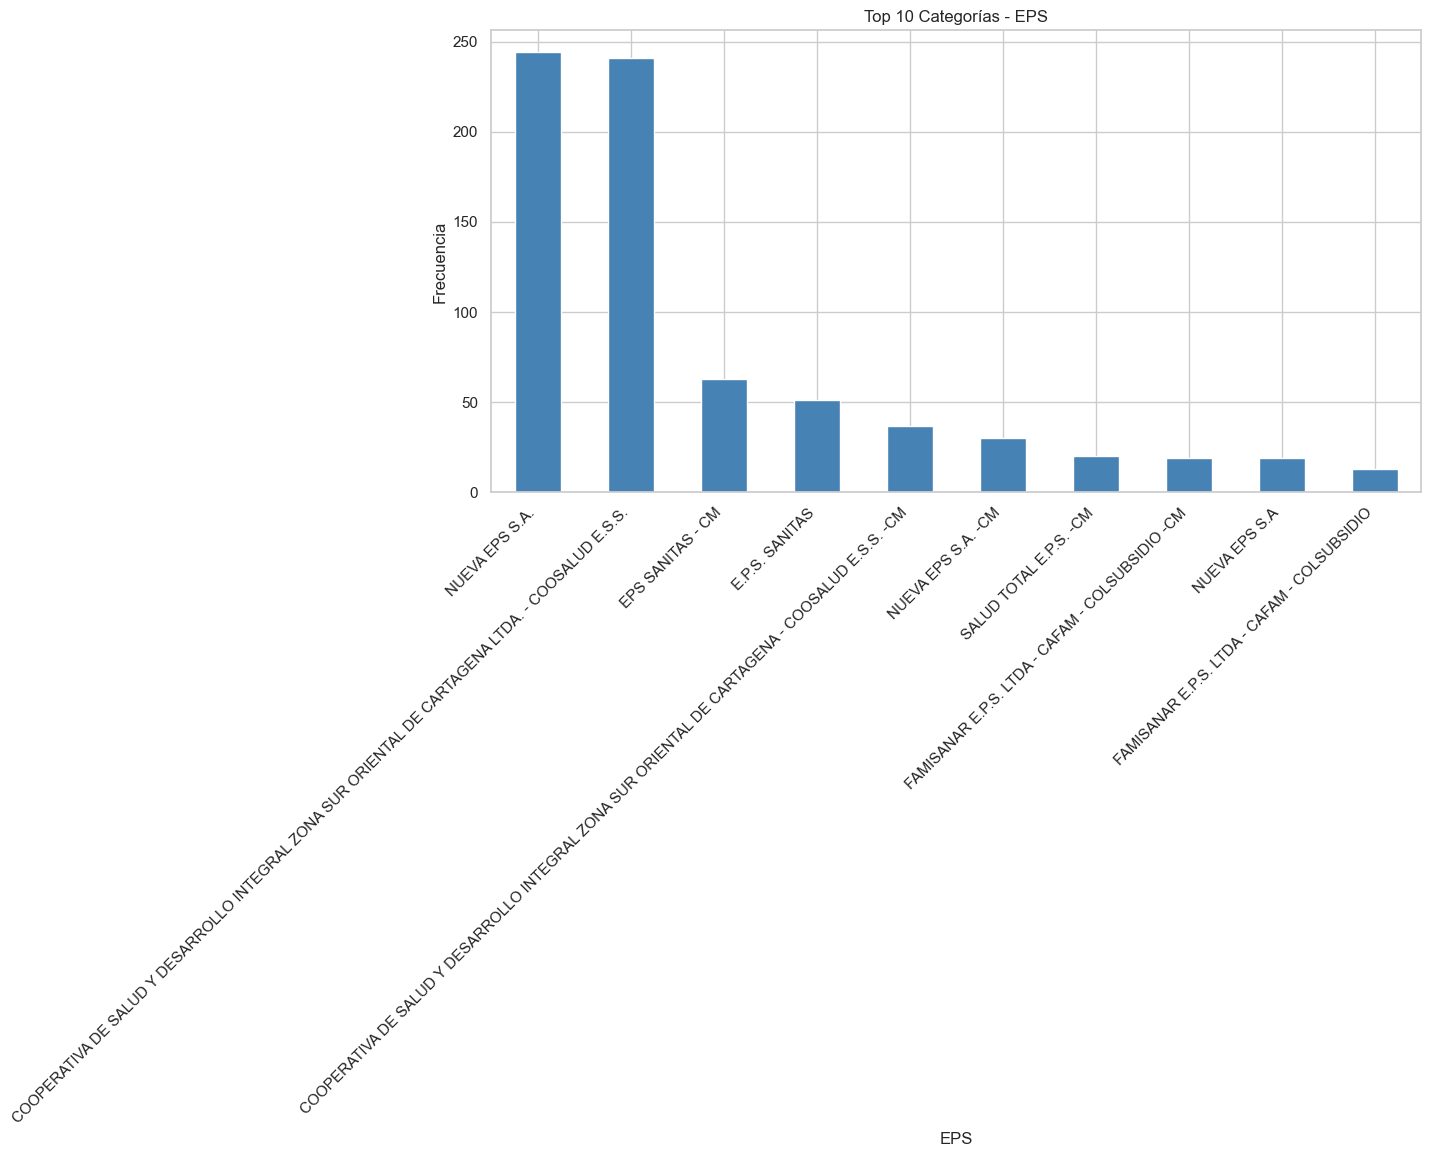


--- Analizando Hora_Nacimiento ---
  Total de categorías únicas: 501
  Top 5 categorías:
    10:35: 6
    10:25: 6
    12:03: 5
    10:51: 5
    11:30: 5


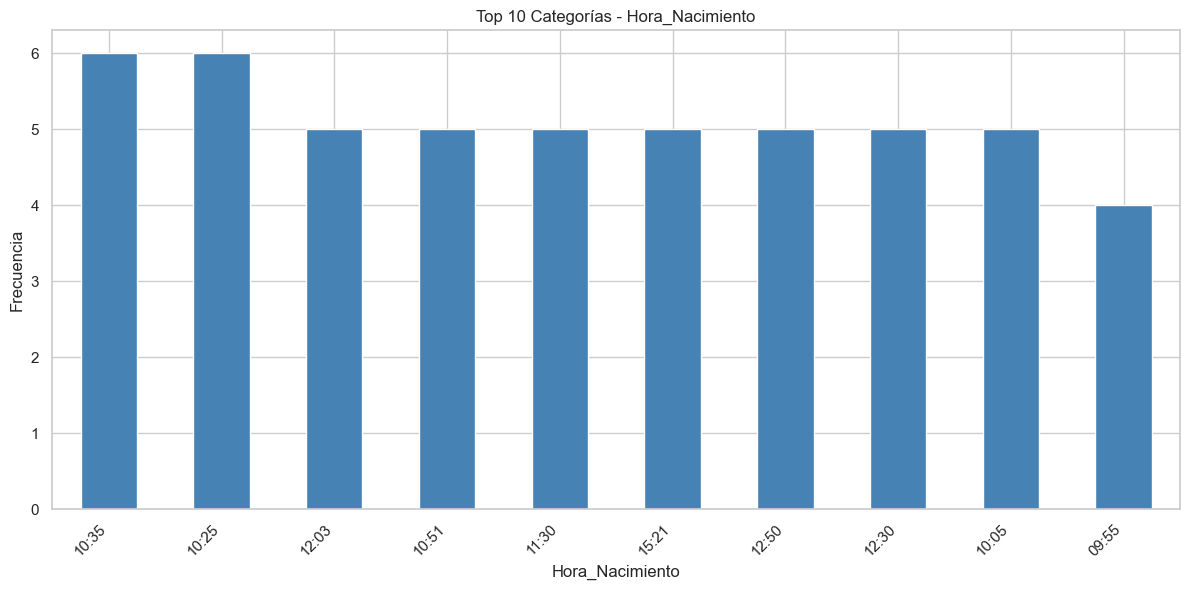


--- Analizando Edad_Madre ---
  Media: 26.72
  Mediana: 26.00
  Desv. Estándar: 6.47


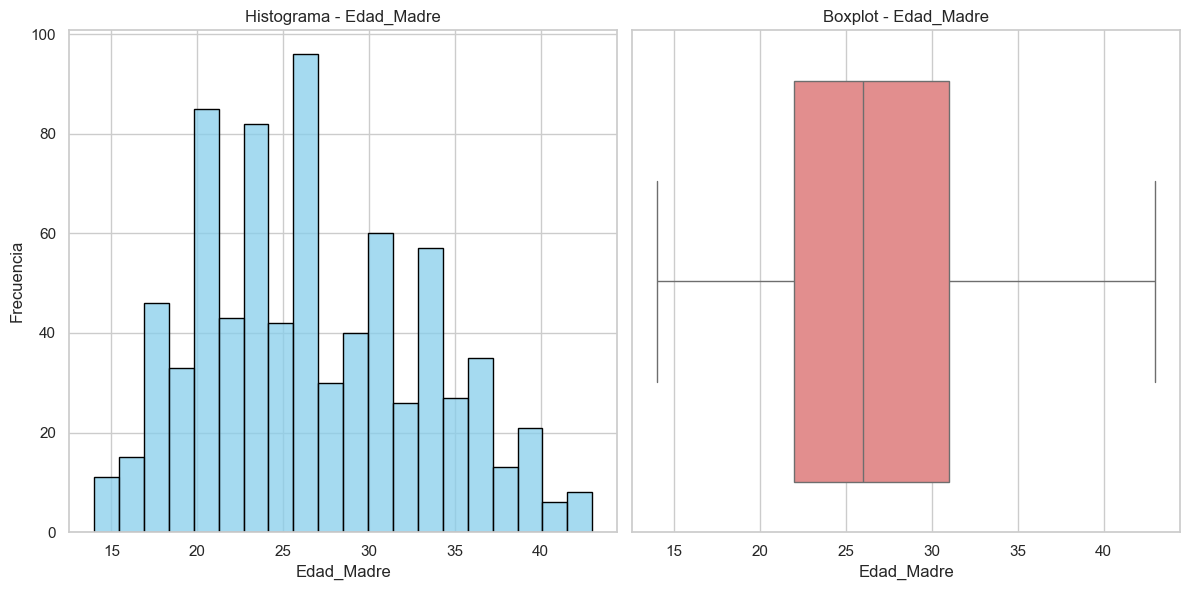


--- Analizando Edad Padre ---
  Media: 30.59
  Mediana: 30.00
  Desv. Estándar: 7.78


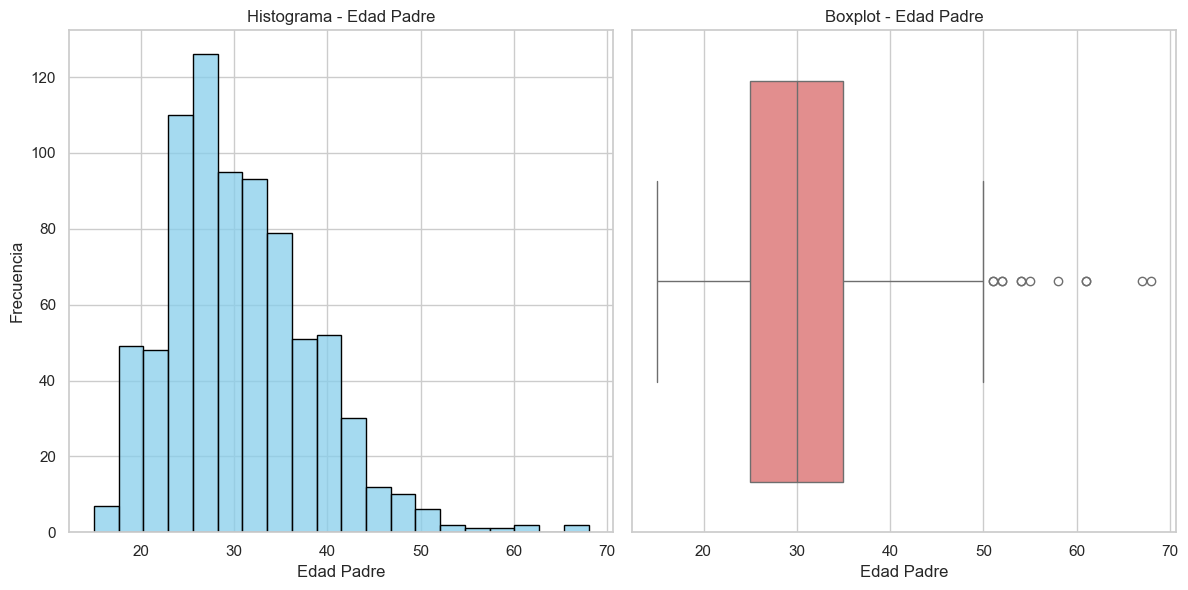


MEDIDAS ESTADÍSTICAS DESCRIPTIVAS

PESO:
------------------------------
Medida               Valor     
------------------------------
Media                3193.46   
Mediana              3180.00   
Moda                 3320.00   
Desv. Estándar       360.62    
Varianza             130048.43 
Coef. Variación      11.29     %
Rango                1910.00   
Mínimo               2270.00   
Máximo               4180.00   
Q1 (25%)             2930.00   
Q3 (75%)             3420.00   
IQR                  490.00    
Asimetría            0.211     
Curtosis             -0.186    

TALLA:
------------------------------
Medida               Valor     
------------------------------
Media                51.88     
Mediana              52.00     
Moda                 51.00     
Desv. Estándar       2.34      
Varianza             5.47      
Coef. Variación      4.51      %
Rango                11.00     
Mínimo               46.00     
Máximo               57.00     
Q1 (25%)             50.

In [15]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Peso', 'Talla', 'Tiempo_Gestación']
        self.variables_categoricas = ['Sexo', 'Tipo_Parto', 'Multiplicidad_Embarazo']

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)
        faltantes = self.df_original.isnull().sum()
        faltantes = faltantes[faltantes > 0]
        if not faltantes.empty:
            print("--- VALORES FALTANTES POR COLUMNA ---")
            print(faltantes)
            plt.figure(figsize=(12, 6))
            sns.heatmap(self.df_original.isnull(), cbar=True, cmap="viridis", yticklabels=False)
            plt.title("Mapa de Datos Faltantes - Dataset Original")
            plt.tight_layout()
            plt.show()
        else:
            print("No se encontraron valores faltantes.")
        self.df_filtrado = self.df_original.dropna()
        filas_eliminadas = len(self.df_original) - len(self.df_filtrado)
        print(f"\n✓ Filas eliminadas: {filas_eliminadas}")
        print(f"✓ Datos restantes: {len(self.df_filtrado)}")
        print(f"✓ Porcentaje de datos conservados: {(len(self.df_filtrado)/len(self.df_original))*100:.1f}%")
        plt.figure(figsize=(12, 6))
        sns.heatmap(self.df_filtrado.isnull(), cbar=True, cmap="viridis", yticklabels=False)
        plt.title("Mapa de Datos Faltantes - Después de Limpieza")
        plt.tight_layout()
        plt.show()

    def eliminar_outliers(self):
        print("\n" + "="*60)
        print("ELIMINACIÓN DE VALORES ATÍPICOS")
        print("="*60)
        df = self.df_filtrado.copy()
        outliers_eliminados = {}
        for var in self.variables_numericas:
            if var in df.columns:
                Q1 = df[var].quantile(0.25)
                Q3 = df[var].quantile(0.75)
                IQR = Q3 - Q1
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR
                mask = df[var].between(limite_inferior, limite_superior)
                outliers_eliminados[var] = (~mask).sum()
                df = df[mask]
                print(f"{var}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
                print(f"  Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
                print(f"  Outliers eliminados: {outliers_eliminados[var]}")
        self.df_sinatipicos = df
        total_eliminados = len(self.df_filtrado) - len(self.df_sinatipicos)
        print(f"\n✓ Total de registros eliminados por outliers: {total_eliminados}")
        print(f"✓ Datos finales: {len(self.df_sinatipicos)}")
        print(f"✓ Porcentaje conservado: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1f}%")

    def analizar_normalidad(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE NORMALIDAD")
        print("="*60)
        alpha = 0.05
        datasets = [("DATASET FILTRADO", self.df_filtrado), ("DATASET SIN OUTLIERS", self.df_sinatipicos)]
        for nombre, dataset in datasets:
            print(f"\n{nombre}:")
            print("-"*40)
            for var in self.variables_numericas:
                if var in dataset.columns:
                    stat, p = stats.shapiro(dataset[var])
                    curtosis = stats.kurtosis(dataset[var])
                    asimetria = stats.skew(dataset[var])
                    resultado = "✓ Distribución NORMAL (no se rechaza H0)" if p > alpha else "✗ Distribución NO NORMAL (se rechaza H0)"
                    print(f"{var}: Shapiro-Wilk={stat:.4f}, p-valor={p:.6f}, Curtosis={curtosis:.3f}, Asimetría={asimetria:.3f}")
                    print(f"  Resultado: {resultado}\n")

    def crear_histogramas(self):
        print("\n" + "="*60)
        print("GENERANDO HISTOGRAMAS COMPARATIVOS")
        print("="*60)
        fig, axes = plt.subplots(2, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 12))
        fig.suptitle('Histogramas Comparativos: Original vs Sin Outliers', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns:
                axes[0, i].hist(self.df_filtrado[var], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
                axes[0, i].set_title(f'{var} (Filtrado)')
                axes[0, i].set_xlabel(var)
                axes[0, i].set_ylabel('Frecuencia')
                axes[0, i].grid(True, alpha=0.3)
                axes[1, i].hist(self.df_sinatipicos[var], bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
                axes[1, i].set_title(f'{var} (Sin Outliers)')
                axes[1, i].set_xlabel(var)
                axes[1, i].set_ylabel('Frecuencia')
                axes[1, i].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def crear_boxplots(self):
        print("\n" + "="*60)
        print("GENERANDO DIAGRAMAS DE CAJA")
        print("="*60)
        fig, axes = plt.subplots(1, len(self.variables_numericas), figsize=(6*len(self.variables_numericas), 6))
        fig.suptitle('Diagramas de Caja: Comparación de Datasets', fontsize=16)
        for i, var in enumerate(self.variables_numericas):
            if var in self.df_filtrado.columns:
                data_to_plot = [self.df_filtrado[var].dropna(), self.df_sinatipicos[var].dropna()]
                box_plot = axes[i].boxplot(data_to_plot, labels=['Filtrado', 'Sin Outliers'], patch_artist=True)
                colors = ['lightblue', 'lightcoral']
                for patch, color in zip(box_plot['boxes'], colors):
                    patch.set_facecolor(color)
                axes[i].set_title(f'Boxplot - {var}')
                axes[i].set_ylabel(var)
                axes[i].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def analizar_categoricas(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
        print("="*60)
        vars_disponibles = [var for var in self.variables_categoricas if var in self.df_sinatipicos.columns]
        if not vars_disponibles:
            print("⚠️  No se encontraron las variables categóricas esperadas")
            print(f"Variables disponibles: {list(self.df_sinatipicos.columns)}")
            return
        n_vars = len(vars_disponibles)
        fig, axes = plt.subplots(2, n_vars, figsize=(6*n_vars, 10))
        if n_vars == 1:
            axes = axes.reshape(2, 1)
        for i, var in enumerate(vars_disponibles):
            datos_var = self.df_sinatipicos[var].value_counts()
            axes[0, i].pie(datos_var.values, labels=datos_var.index, autopct='%1.1f%%', startangle=90)
            axes[0, i].set_title(f'Distribución - {var}')
            datos_var.plot(kind='bar', ax=axes[1, i], color='steelblue')
            axes[1, i].set_title(f'Frecuencias - {var}')
            axes[1, i].set_xlabel(var)
            axes[1, i].set_ylabel('Frecuencia')
            axes[1, i].tick_params(axis='x', rotation=45)
            print(f"\n{var}:")
            for categoria, freq in datos_var.items():
                pct = (freq / len(self.df_sinatipicos)) * 100
                print(f"  {categoria}: {freq} ({pct:.1f}%)")
        plt.tight_layout()
        plt.show()

    def analizar_variables_adicionales(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE VARIABLES ADICIONALES")
        print("="*60)
        variables_adicionales = ['EPS', 'Hora_Nacimiento', 'Edad_Madre', 'Edad Padre']
        for var in variables_adicionales:
            if var in self.df_sinatipicos.columns:
                print(f"\n--- Analizando {var} ---")
                plt.figure(figsize=(12, 6))
                if pd.api.types.is_numeric_dtype(self.df_sinatipicos[var]):
                    plt.subplot(1, 2, 1)
                    sns.histplot(self.df_sinatipicos[var], bins=20, kde=False, edgecolor='black', color='skyblue')
                    plt.title(f'Histograma - {var}')
                    plt.xlabel(var)
                    plt.ylabel('Frecuencia')
                    plt.subplot(1, 2, 2)
                    sns.boxplot(x=self.df_sinatipicos[var], color='lightcoral')
                    plt.title(f'Boxplot - {var}')
                    plt.xlabel(var)
                    datos = self.df_sinatipicos[var]
                    print(f"  Media: {datos.mean():.2f}")
                    print(f"  Mediana: {datos.median():.2f}")
                    print(f"  Desv. Estándar: {datos.std():.2f}")
                else:
                    top_categorias = self.df_sinatipicos[var].value_counts().head(10)
                    top_categorias.plot(kind='bar', color='steelblue')
                    plt.title(f'Top 10 Categorías - {var}')
                    plt.xlabel(var)
                    plt.ylabel('Frecuencia')
                    plt.xticks(rotation=45, ha='right')
                    print(f"  Total de categorías únicas: {self.df_sinatipicos[var].nunique()}")
                    print("  Top 5 categorías:")
                    for cat, freq in top_categorias.head().items():
                        print(f"    {cat}: {freq}")
                plt.tight_layout()
                plt.show()
            else:
                print(f"⚠️  Variable '{var}' no encontrada en el dataset")

    def calcular_estadisticas(self):
        print("\n" + "="*60)
        print("MEDIDAS ESTADÍSTICAS DESCRIPTIVAS")
        print("="*60)
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns:
                datos = self.df_sinatipicos[var]
                print(f"\n{var.upper()}:\n{'-'*30}")
                print(f"{'Medida':<20} {'Valor':<10}")
                print(f"{'-'*30}")
                print(f"{'Media':<20} {datos.mean():<10.2f}")
                print(f"{'Mediana':<20} {datos.median():<10.2f}")
                print(f"{'Moda':<20} {datos.mode().iloc[0]:<10.2f}")
                print(f"{'Desv. Estándar':<20} {datos.std():<10.2f}")
                print(f"{'Varianza':<20} {datos.var():<10.2f}")
                print(f"{'Coef. Variación':<20} {(datos.std()/datos.mean())*100:<10.2f}%")
                print(f"{'Rango':<20} {datos.max() - datos.min():<10.2f}")
                print(f"{'Mínimo':<20} {datos.min():<10.2f}")
                print(f"{'Máximo':<20} {datos.max():<10.2f}")
                print(f"{'Q1 (25%)':<20} {datos.quantile(0.25):<10.2f}")
                print(f"{'Q3 (75%)':<20} {datos.quantile(0.75):<10.2f}")
                print(f"{'IQR':<20} {datos.quantile(0.75) - datos.quantile(0.25):<10.2f}")
                print(f"{'Asimetría':<20} {stats.skew(datos):<10.3f}")
                print(f"{'Curtosis':<20} {stats.kurtosis(datos):<10.3f}")

    def generar_reporte_final(self):
        print("\n" + "="*60)
        print("REPORTE FINAL DEL ANÁLISIS")
        print("="*60)
        print(f"📊 RESUMEN DE DATOS:")
        print(f"   • Registros originales: {len(self.df_original):,}")
        print(f"   • Registros después de limpieza: {len(self.df_filtrado):,}")
        print(f"   • Registros finales (sin outliers): {len(self.df_sinatipicos):,}")
        print(f"   • Porcentaje de datos conservados: {(len(self.df_sinatipicos)/len(self.df_original))*100:.1f}%")
        print(f"\n🔍 VARIABLES ANALIZADAS:")
        print(f"   • Variables numéricas: {', '.join(self.variables_numericas)}")
        print(f"   • Variables categóricas: {', '.join(self.variables_categoricas)}")
        print(f"\n📈 HALLAZGOS PRINCIPALES:")
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns:
                _, p = stats.shapiro(self.df_sinatipicos[var])
                normalidad = "Normal" if p > 0.05 else "No Normal"
                print(f"   • {var}: Distribución {normalidad} (p={p:.4f})")
        print(f"\n✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
        print(f"   • Dataset limpio y preparado para análisis avanzados")
        print(f"   • Todas las visualizaciones generadas")
        print(f"   • Estadísticas descriptivas calculadas")

    def ejecutar_analisis_completo(self):
        print("🚀 INICIANDO ANÁLISIS ESTADÍSTICO COMPLETO")
        print("="*60)
        if not self.cargar_datos():
            return False
        self.limpiar_datos()
        self.eliminar_outliers()
        self.analizar_normalidad()
        self.crear_histogramas()
        self.crear_boxplots()
        self.analizar_categoricas()
        self.analizar_variables_adicionales()
        self.calcular_estadisticas()
        self.generar_reporte_final()
        return True

def main():
    print("🎯 ANALIZADOR ESTADÍSTICO DE DATOS DE NACIMIENTOS")
    print("="*60)
    archivo = input("📁 Ingrese la ruta del archivo CSV: ").strip()
    if not archivo:
        print("❌ Debe proporcionar una ruta de archivo")
        return
    analizador = AnalizadorNacimientos(archivo)
    try:
        success = analizador.ejecutar_analisis_completo()
        if success:
            print("\n🎉 ¡ANÁLISIS COMPLETADO CON ÉXITO!")
        else:
            print("\n❌ El análisis no pudo completarse")
    except KeyboardInterrupt:
        print("\n\n⚠️  Análisis interrumpido por el usuario")
    except Exception as e:
        print(f"\n❌ Error durante el análisis: {e}")

if __name__ == "__main__":
    main()
